
--- Simulating Smart Campus Network Traffic ---
Admin ↔ Library: Load = 99% | Effective Latency = 14.95 ms
Admin ↔ CSE_Block: Load = 89% | Effective Latency = 7.23 ms
Library ↔ Hostel: Load = 38% | Effective Latency = 9.52 ms
Hostel ↔ Cafeteria: Load = 81% | Effective Latency = 16.86 ms
CSE_Block ↔ ECE_Block: Load = 65% | Effective Latency = 5.30 ms
CSE_Block ↔ EEE_Block: Load = 76% | Effective Latency = 4.14 ms
ECE_Block ↔ EEE_Block: Load = 33% | Effective Latency = 6.99 ms
EEE_Block ↔ Auditorium: Load = 22% | Effective Latency = 9.99 ms
Auditorium ↔ Cafeteria: Load = 20% | Effective Latency = 7.70 ms

Average Network Latency : 9.19 ms
Average Used Bandwidth  : 100.14 Mbps

--- Optimizing Route from Admin to Cafeteria ---
Optimal Path Found : Admin -> CSE_Block -> EEE_Block -> Auditorium -> Cafeteria
Total Latency      : 24.00 ms


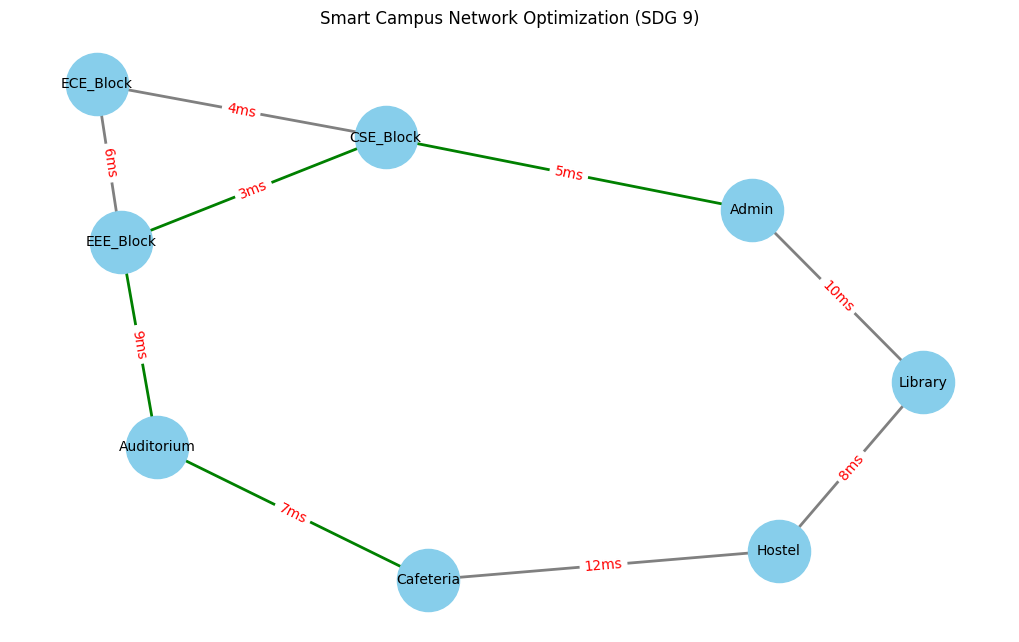

In [1]:
# -------------------------------------------------------------
# Smart Campus Network Optimization using Simulation Tools
# Course: CS3591 - Computer Networks
# SDG 9: Industry, Innovation & Infrastructure
# -------------------------------------------------------------
# This script:
#   1. Auto-installs required libraries (networkx, matplotlib)
#   2. Builds a Smart Campus network topology
#   3. Simulates traffic load and latency
#   4. Optimizes routes using Dijkstra’s algorithm
#   5. Visualizes the optimized network
# -------------------------------------------------------------

import sys
import subprocess
import random

# -------------------------------------------------------------
# Auto-install missing libraries
# -------------------------------------------------------------
def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing missing library: {package} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for pkg in ["networkx", "matplotlib"]:
    install_if_missing(pkg)

# Import now that they’re installed
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Create Smart Campus Topology
# -------------------------------------------------------------
G = nx.Graph()

campus_buildings = [
    "Admin", "Library", "Hostel", "CSE_Block",
    "ECE_Block", "EEE_Block", "Auditorium", "Cafeteria"
]

G.add_nodes_from(campus_buildings)

# Define links with (bandwidth in Mbps, latency in ms)
links = [
    ("Admin", "Library", 100, 10),
    ("Admin", "CSE_Block", 200, 5),
    ("Library", "Hostel", 150, 8),
    ("Hostel", "Cafeteria", 80, 12),
    ("CSE_Block", "ECE_Block", 250, 4),
    ("ECE_Block", "EEE_Block", 200, 6),
    ("EEE_Block", "Auditorium", 100, 9),
    ("Auditorium", "Cafeteria", 120, 7),
    ("CSE_Block", "EEE_Block", 300, 3),
]

for u, v, bandwidth, latency in links:
    G.add_edge(u, v, bandwidth=bandwidth, latency=latency)

# -------------------------------------------------------------
# 2. Simulate Traffic Loads
# -------------------------------------------------------------
def simulate_traffic(G):
    print("\n--- Simulating Smart Campus Network Traffic ---")
    total_latency = 0
    total_bandwidth = 0

    for (u, v, data) in G.edges(data=True):
        load = random.randint(20, 100)  # 20–100% random load
        latency = data["latency"] * (1 + load / 200)  # latency increases with load
        total_latency += latency
        total_bandwidth += data["bandwidth"] * (load / 100)

        # Save results
        G[u][v]["current_latency"] = round(latency, 2)
        G[u][v]["load_%"] = load

        print(f"{u} ↔ {v}: Load = {load}% | Effective Latency = {latency:.2f} ms")

    avg_latency = total_latency / G.number_of_edges()
    avg_bandwidth = total_bandwidth / G.number_of_edges()

    print(f"\nAverage Network Latency : {avg_latency:.2f} ms")
    print(f"Average Used Bandwidth  : {avg_bandwidth:.2f} Mbps")

# -------------------------------------------------------------
# 3. Optimize Routes using Dijkstra’s Algorithm
# -------------------------------------------------------------
def optimize_routes(G, source, target):
    print(f"\n--- Optimizing Route from {source} to {target} ---")
    try:
        shortest_path = nx.dijkstra_path(G, source, target, weight='latency')
        total_latency = nx.dijkstra_path_length(G, source, target, weight='latency')
        print(f"Optimal Path Found : {' -> '.join(shortest_path)}")
        print(f"Total Latency      : {total_latency:.2f} ms")
        return shortest_path
    except nx.NetworkXNoPath:
        print("No available path between nodes!")
        return None

# -------------------------------------------------------------
# 4. Visualize the Network Topology
# -------------------------------------------------------------
def draw_network(G, optimal_path=None):
    pos = nx.spring_layout(G, seed=42)
    edge_colors = []

    for u, v in G.edges():
        if optimal_path and (u, v) in zip(optimal_path, optimal_path[1:]):
            edge_colors.append('green')  # Highlight optimized path
        elif optimal_path and (v, u) in zip(optimal_path, optimal_path[1:]):
            edge_colors.append('green')
        else:
            edge_colors.append('gray')

    plt.figure(figsize=(10, 6))
    nx.draw(
        G, pos, with_labels=True, node_color='skyblue',
        node_size=2000, font_size=10, edge_color=edge_colors, width=2
    )

    edge_labels = {
        (u, v): f"{data['latency']}ms" for u, v, data in G.edges(data=True)
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Smart Campus Network Optimization (SDG 9)")
    plt.show()

# -------------------------------------------------------------
# 5. Main Execution
# -------------------------------------------------------------
if __name__ == "__main__":
    simulate_traffic(G)
    best_path = optimize_routes(G, "Admin", "Cafeteria")
    draw_network(G, best_path)